Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [5]:
from google.colab import files
uploaded = files.upload()

Saving student_scores_1000.csv to student_scores_1000.csv


In [9]:
df =pd.read_csv('student_scores_1000.csv')
print('Our data')
df

Our data


,Hours,Scores
0,3.745401,19.615511
1,9.507143,40.858994
2,7.319939,38.500686
3,5.986585,32.985853
4,1.560186,10.599884
...,...,...
995,0.915821,0.000000
996,9.173136,42.806833
997,1.368186,6.655748
998,9.502374,45.365357


Analyse the data

In [10]:
df.shape

(1000, 2)

In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   1000 non-null   float64
 1   Scores  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [13]:
df.describe()

,Hours,Scores
count,1000.000000,1000.000000
mean,4.902566,25.097242
std,2.921374,15.040316
min,0.046320,0.000000
25%,2.359733,12.172172
50%,4.968074,25.231693
75%,7.443196,37.542857
max,9.997177,60.253591


In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.947071
Scores,0.947071,1.000000


In [15]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


Visualization

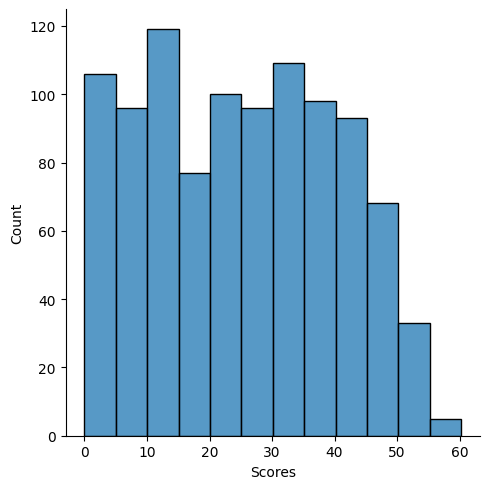

In [17]:
sns.displot(df['Scores'])
plt.show()

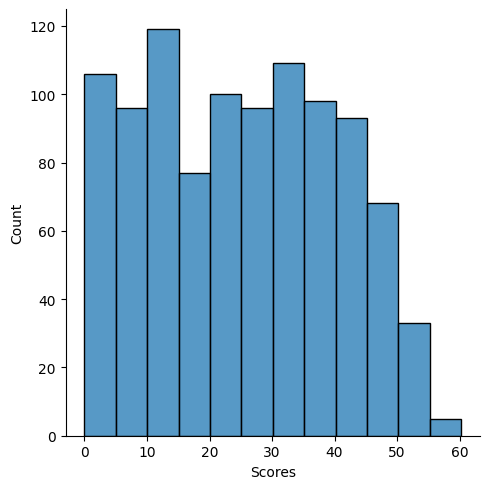

In [22]:
sns.displot(df["Scores"])
plt.show()

Plot between score and hours

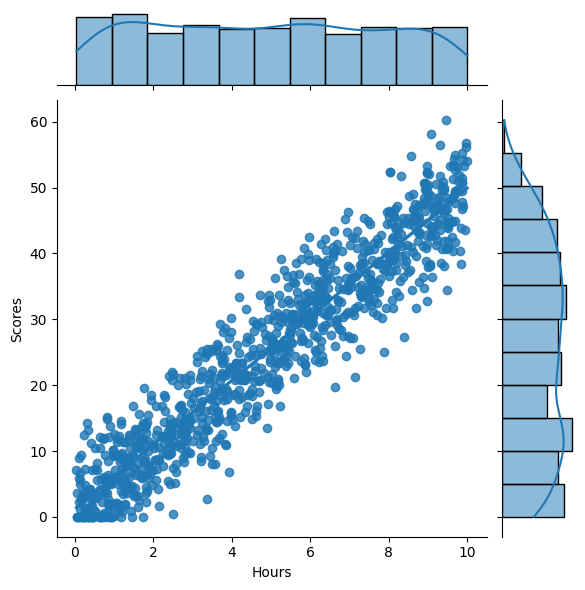

In [25]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='reg')
plt.show()

Score and Hours Correlation

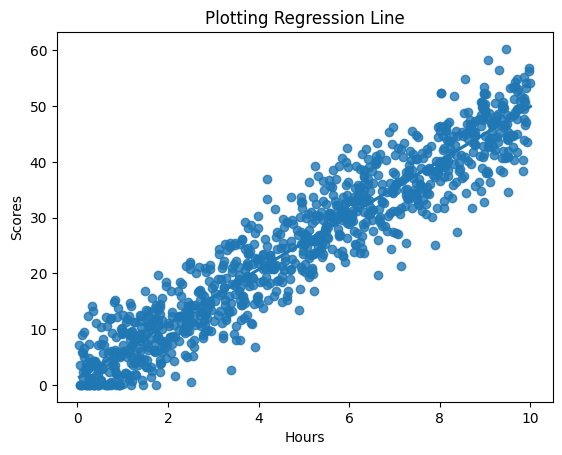

In [26]:
sns.regplot(x="Hours",y="Scores",data=df)
plt.title("Plotting Regression Line")
plt.show()

Use Simple linear regression to predict the data

In [34]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete")
y_pred=regressor.predict(X_test)
print(y_pred)

Training complete
[30.01924453  4.56899503 31.6039259  28.59793834  5.27376539 46.83652275
 26.33184367 25.76913073 26.43208335 17.02163605 29.70024159 38.02065078
 10.19203044  9.97431561 25.25865267 46.11086912 41.0438051   9.84116228
 10.20305682  4.97346535  9.65473039 35.13906762 22.68001881  5.18752618
  6.43219251 23.79766642 33.52689455 26.05703389  8.74014924 47.51021361
 20.7002362  38.26765117 43.76752549  8.82149556 45.31065087 20.42252299
  3.6595848  48.01853042 38.43155138 35.46587465 39.94566892 45.88958208
 23.08958061  8.87056528 20.066022   18.15421671 17.64480844 13.59744518
 21.22349712  7.63410903 38.15208669 26.72043842  8.17775076 31.37721652
 26.82461312 25.28300047 43.45183408 40.65163996 22.47894446 13.52275232
 18.27840451 17.27120334 25.50767195  9.22311765 29.20444479 36.60473615
 43.95163529 49.88789815 42.6786231   8.5168855  22.68795138  5.52188735
 23.8303686  48.28366068 14.41720786 47.50501414 40.52905612 46.60791891
 14.89819397 22.32524051 49.41900

Compare Actual and Predicted

In [36]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,30.484571,30.019245
1,0.000000,4.568995
2,38.648323,31.603926
3,35.500529,28.597938
4,5.215453,5.273765
...,...,...
295,5.866385,10.430791
296,45.365357,47.487071
297,35.179125,36.713087
298,34.052320,31.470111


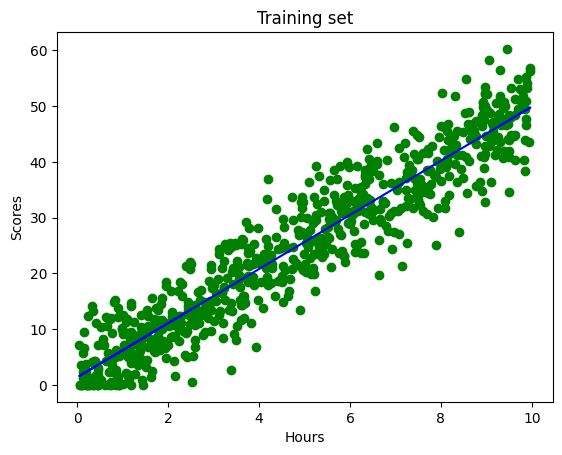

In [37]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Training set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Calculate the coefficient of linear regression

In [38]:
mean_x=np.mean(df['Hours'])
mean_y=np.mean(df['Scores'])
num=0
den=0
x=list(df['Hours'])
y=list(df['Scores'])
for i in range(len(df)):
  num+=(x[i]-mean_x)*(y[i]-mean_y)
  den+=(x[i]-mean_x)**2
B1=num/den

In [39]:
B0=mean_y-(B1*mean_x)


In [48]:
df['predicted_scores']=B0 + B1*df['Hours']

In [42]:
df.head()

,Hours,Scores
0,3.745401,19.615511
1,9.507143,40.858994
2,7.319939,38.500686
3,5.986585,32.985853
4,1.560186,10.599884


[]

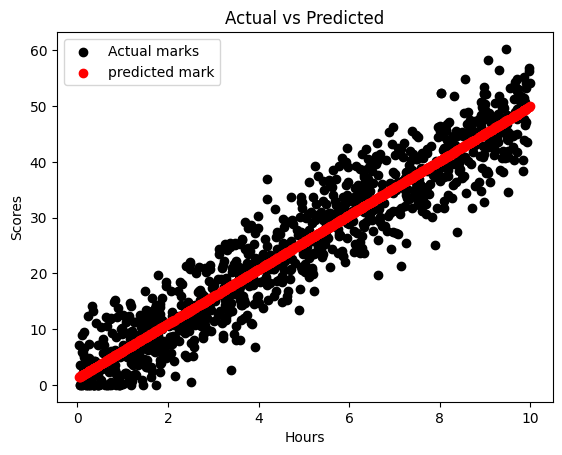

In [49]:
plt.scatter(df['Hours'],df['Scores'],c='black',label='Actual marks')
plt.scatter(df['Hours'],df['predicted_scores'],c='red',label='predicted mark')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.plot()


Categorsing the student who passed or failed

In [51]:
passing_score=40
required_hours=(passing_score)/10 # Assuming B0 is 10, replace with actual value if available
print(f'To pass the exam a student needs to study approximately {required_hours:.2f} hours')

To pass the exam a student needs to study approximately 4.00 hours
